In [3]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [4]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=5)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [37]:
colours = ['#006a9c','#d05a9d' ,'#e69500']
# colours = ['#ebe831','#ffae2f' ,'#ff725c']
leg_labels = ['100K', '500K' , '1700K']

files = glob.glob('*heating.dat')

heat_data = {}

for file in files:
    heat_data[file.replace('_heating.dat', '')] = pd.read_csv(file, sep="\t", header = None)

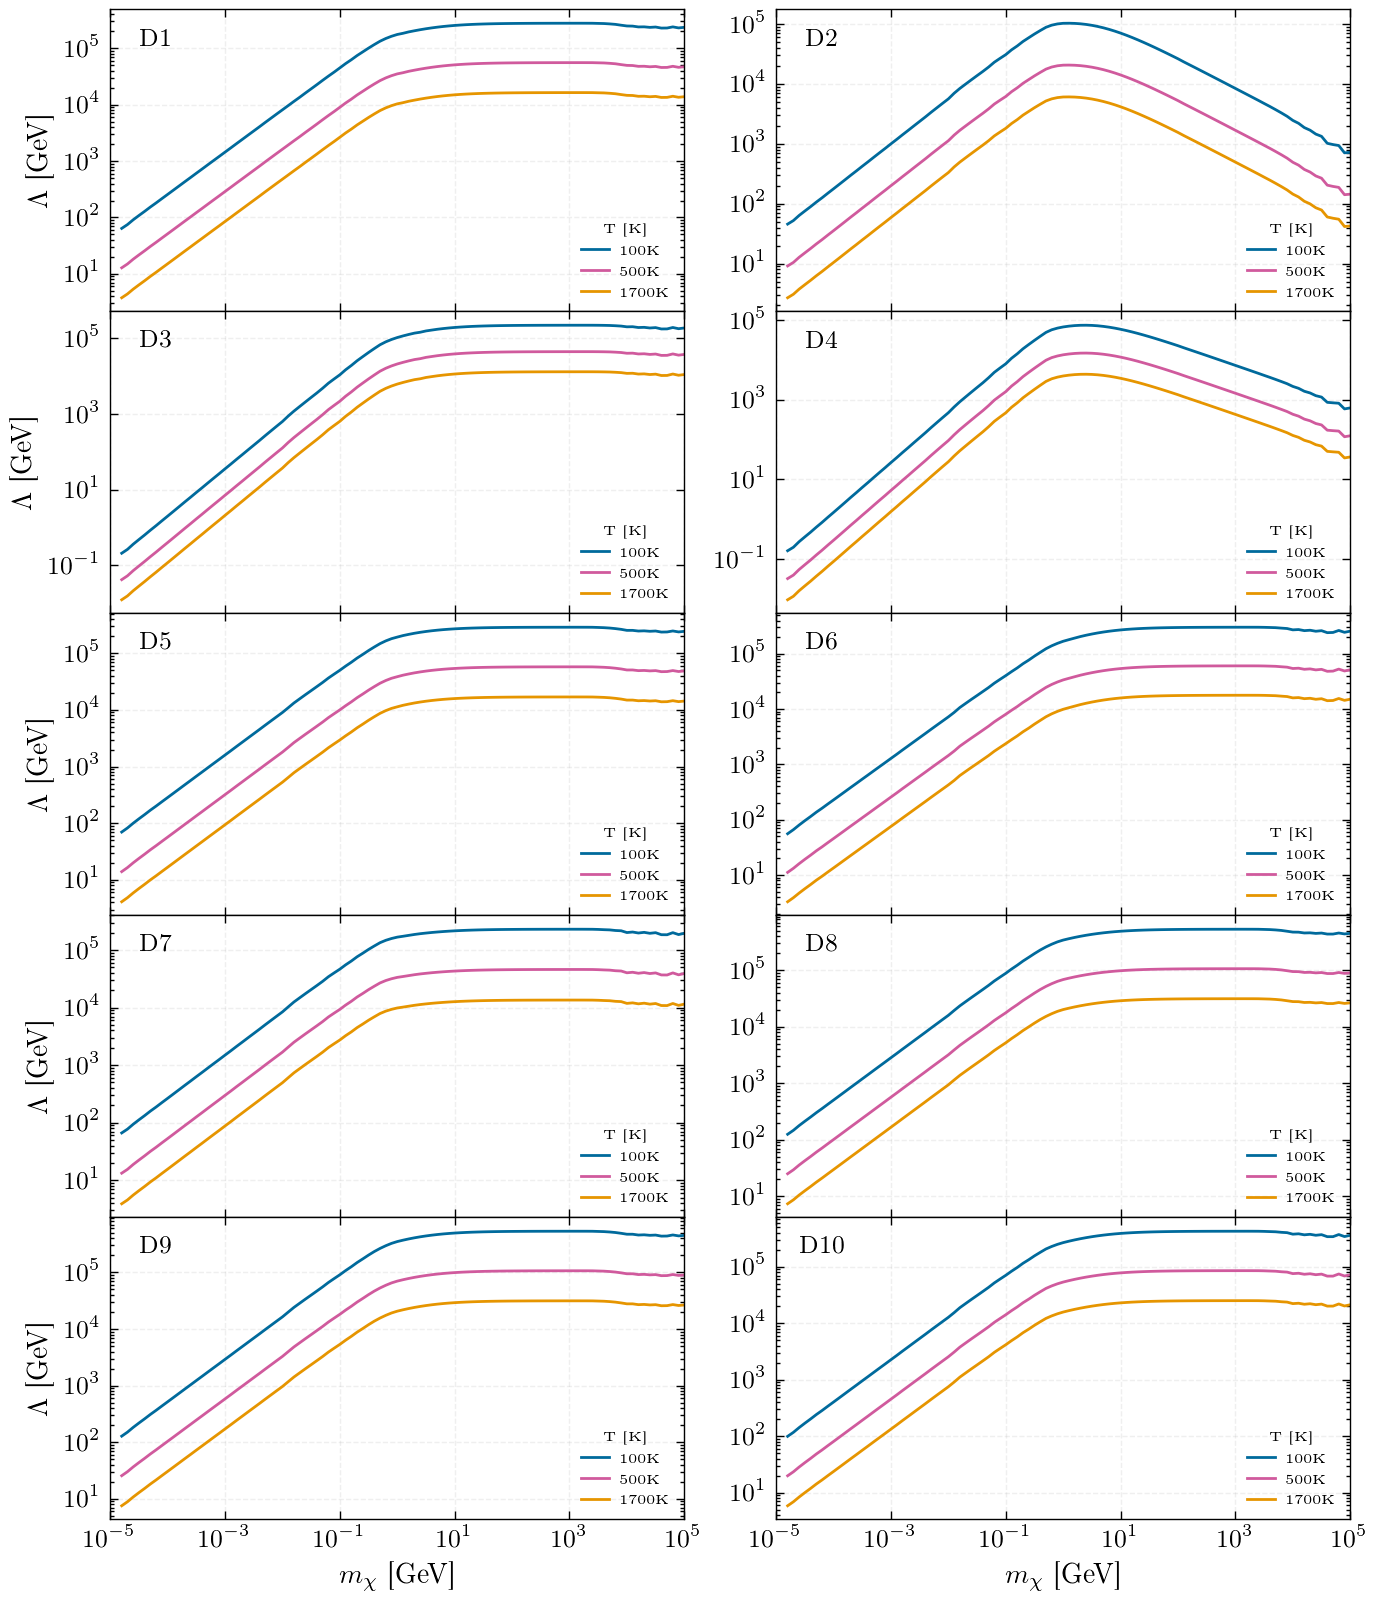

In [38]:
fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = False, sharex = True, dpi = 200)
fig.subplots_adjust(hspace=0, wspace=.16)
# fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
# fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
i=1
for m, row in enumerate(ax):
    for n, col in enumerate(row):
        for j in range(len(heat_data['d'+str(i)].columns))[1:]:
            col.loglog(heat_data['d'+str(i)][0], heat_data['d'+str(i)][j], colours[j-1], label = leg_labels[j-1])
            
        col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
        col.set_xlabel('$m_\chi$ [GeV]')
        col.set_xlim(1e-5, 1e5)
        col.legend(loc = 'lower right', shadow = False).set_title(title = 'T [K]', prop={"size": 5})
        col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
        if n ==0:
            col.set_ylabel('$\Lambda$ [GeV]')
        i+=1
plt.savefig('heating_plots.pdf')